In [ ]:
# !git clone https://github.com/recepgul82/music-digital-methods.git
# !pip install -r music-digital-methods/setup/requirements.txt

# Week 2 – Small Assignment  
## Detecting Popular Genre Patterns from Platform Data

In this assignment, you will:

- Load a prepared dataset (`spotify_data.csv`)
- Clean and inspect the data
- Extract release year
- Expand genre information
- Perform basic aggregation
- Interpret results critically

Focus:
- What is being measured?
- What is a proxy?
- What assumptions are embedded?


2) Import modules

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
pd.set_option('display.float_format', '{:.0f}'.format)

3. Load Dataset
- Using pd.load_csv() load the data and call it `df`

In [ ]:
# TODO: Load the dataset from "spotify_data.csv" into a DataFrame called df
df = pd.read_csv("...", index_col=0) #TODO

df.head() #inspect the data

,artist_and_title,wks,t10,pk,(x?),pkstreams,total,artist,title,country,deezer_track_id,deezer_release_date,deezer_genres
0,J. Cole - No Role Modelz,510,1,10,NaN,4946936,1248840407,J. Cole,No Role Modelz,us,1591188152,2014-12-09,['Rap/Hip Hop']
1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,"['Film/Oyun', 'Film Müzikleri']"
2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,"['Alternatif', 'Rock']"
3,Juice WRLD - Lucid Dreams,262,26,1,(x1),13963947,928829032,Juice WRLD,Lucid Dreams,us,601837422,2018-12-10,['Rap/Hip Hop']
4,"Tyler, The Creator - See You Again",241,9,5,NaN,7700794,882340160,"Tyler, The Creator",See You Again,us,384157591,2017-07-21,['Rap/Hip Hop']


4. Basic Inspection
* Using the functions below try to understand the dataset

In [11]:
#TODO use info .method from pandas
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   artist_and_title     200 non-null    str    
 1   wks                  200 non-null    int64  
 2   t10                  159 non-null    float64
 3   pk                   200 non-null    int64  
 4   (x?)                 118 non-null    str    
 5   pkstreams            200 non-null    int64  
 6   total                200 non-null    int64  
 7   artist               200 non-null    str    
 8   title                200 non-null    str    
 9   country              200 non-null    str    
 10  deezer_track_id      185 non-null    float64
 11  deezer_release_date  185 non-null    str    
 12  deezer_genres        185 non-null    str    
dtypes: float64(2), int64(4), str(7)
memory usage: 20.4 KB


In [12]:
#TODO use .describe method from pandas
df.describe()

,wks,t10,pk,pkstreams,total,deezer_track_id
count,200,159,200,200,200,185
mean,146,17,8,8248043,357976217,1627243895
std,85,11,13,7579016,259614378,1134356081
min,29,1,1,808262,89446966,953097
25%,86,9,1,3098747,114875542,491446972
50%,128,16,2,5558953,334268991,1734269797
75%,184,22,8,11074037,553941510,2681768772
max,510,68,62,38690532,1248840407,3823486231


5) Distribution of Peak Streams

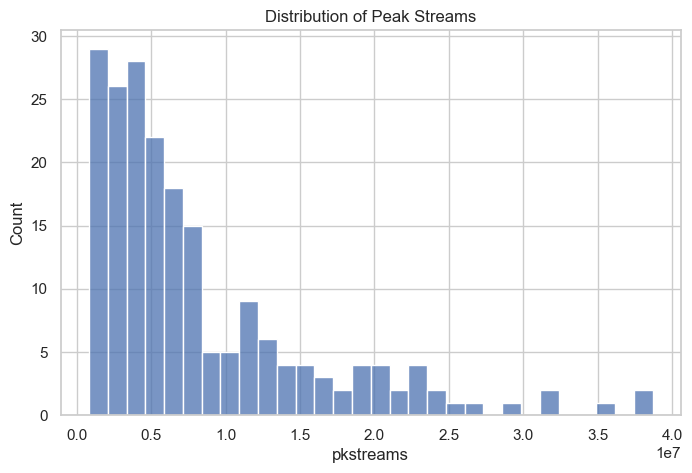

In [ ]:
plt.figure(figsize=(8,5))

sns.histplot(
    data=df,
    x="pkstreams", #TODO write down the column name for peak streams
    bins=30
)

plt.title("Distribution of Peak Streams")
plt.show()

Is the distribution symmetric or skewed?
What does this suggest about musical popularity?


6. Weeks vs Peak Position

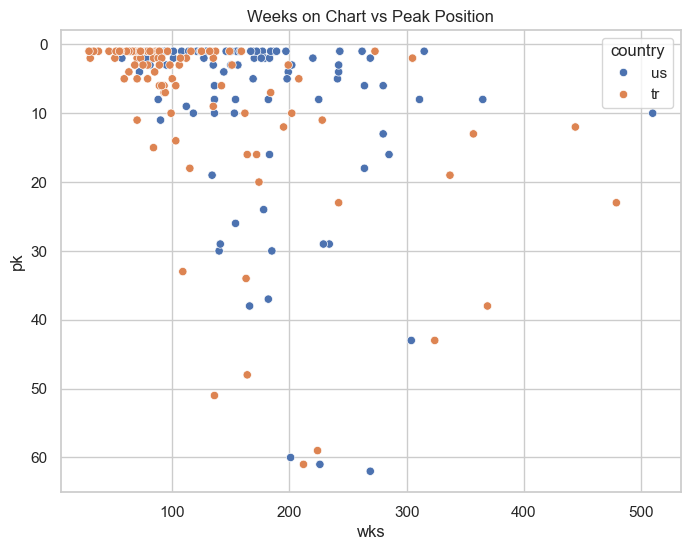

In [ ]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df,
    x="...", # country
    y="...", # number of peaks
    hue="..." # compare by?
)

plt.gca().invert_yaxis()

plt.title("Weeks on Chart vs Peak Position")
plt.show()

7. Prepare Genre Column

In [15]:
# Convert string representation into list
df["deezer_genres"] = df["deezer_genres"].apply(
    lambda x: x.strip("[]").split(",") if isinstance(x, str) else []
)

df.head()

,artist_and_title,wks,t10,pk,(x?),pkstreams,total,artist,title,country,deezer_track_id,deezer_release_date,deezer_genres
0,J. Cole - No Role Modelz,510,1,10,NaN,4946936,1248840407,J. Cole,No Role Modelz,us,1591188152,2014-12-09,['Rap/Hip Hop']
1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,"['Film/Oyun', 'Film Müzikleri']"
2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,"['Alternatif', 'Rock']"
3,Juice WRLD - Lucid Dreams,262,26,1,(x1),13963947,928829032,Juice WRLD,Lucid Dreams,us,601837422,2018-12-10,['Rap/Hip Hop']
4,"Tyler, The Creator - See You Again",241,9,5,NaN,7700794,882340160,"Tyler, The Creator",See You Again,us,384157591,2017-07-21,['Rap/Hip Hop']


8. Expand Genres

In [ ]:
# TODO: create a new dataframe called df_genres
# that expands each genre into a separate row

df_genres = df.explode("...").reset_index()

df_genres.head()

,index,artist_and_title,wks,t10,pk,(x?),pkstreams,total,artist,title,country,deezer_track_id,deezer_release_date,deezer_genres
0,0,J. Cole - No Role Modelz,510,1,10,NaN,4946936,1248840407,J. Cole,No Role Modelz,us,1591188152,2014-12-09,'Rap/Hip Hop'
1,1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,'Film/Oyun'
2,1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,'Film Müzikleri'
3,2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,'Alternatif'
4,2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,'Rock'


9. Most Frequent Genres

In [ ]:
genre_counts = df_genres["..."].value_counts()

# TODO using .head method look at first 10 genres
...


,artist_and_title,wks,t10,pk,(x?),pkstreams,total,artist,title,country,deezer_track_id,deezer_release_date,deezer_genres
0,J. Cole - No Role Modelz,510,1,10,NaN,4946936,1248840407,J. Cole,No Role Modelz,us,1591188152,2014-12-09,'Rap/Hip Hop'
1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,'Film/Oyun'
1,Post Malone - Sunflower - Spider-Man: Into the...,315,45,1,(x6),14731867,1181577968,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,us,602456552,2018-12-14,'Film Müzikleri'
2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,'Alternatif'
2,The Neighbourhood - Sweater Weather,365,6,8,NaN,5562447,1060912262,The Neighbourhood,Sweater Weather,us,66506871,2013-04-19,'Rock'
3,Juice WRLD - Lucid Dreams,262,26,1,(x1),13963947,928829032,Juice WRLD,Lucid Dreams,us,601837422,2018-12-10,'Rap/Hip Hop'
4,"Tyler, The Creator - See You Again",241,9,5,NaN,7700794,882340160,"Tyler, The Creator",See You Again,us,384157591,2017-07-21,'Rap/Hip Hop'
5,Zach Bryan - Something in the Orange,199,3,4,NaN,6487876,875852948,Zach Bryan,Something in the Orange,us,1714552247,2022-04-22,
6,Morgan Wallen - Last Night,155,34,1,(x7),16883425,852753996,Morgan Wallen,Last Night,us,3398329531,2023-03-03,
7,Kendrick Lamar - HUMBLE.,243,21,1,(x9),23993465,825364950,Kendrick Lamar,HUMBLE.,us,350171311,2017-04-14,'Rap/Hip Hop'


10. Genre Distribution by Country

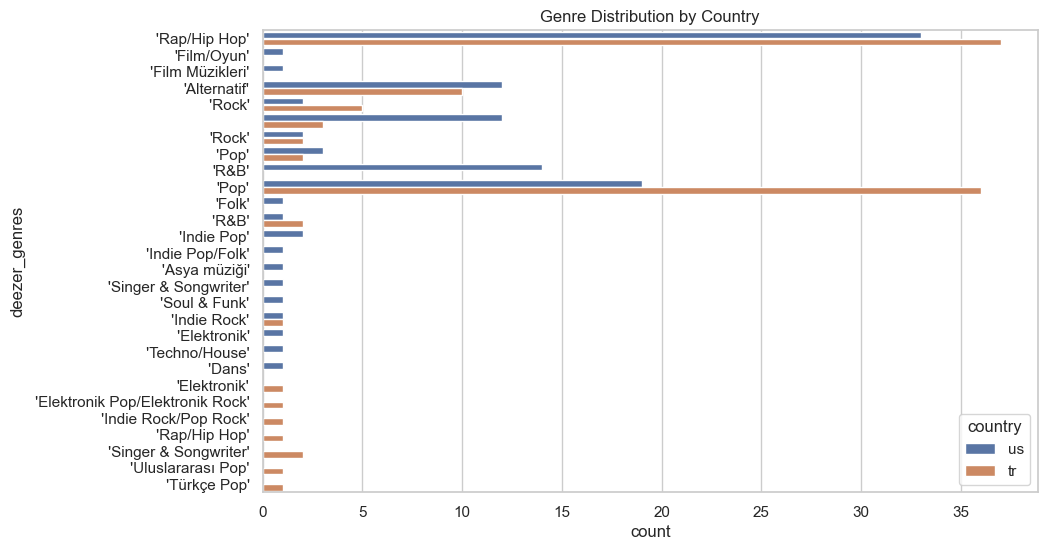

In [ ]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_genres,
    y="...", # write down what columns should be on y axis
    hue="country"
)

plt.title("Genre Distribution by Country")
plt.show()


Write 150–200 words:

1. Did we detect popular genres?
2. What assumptions are embedded in this dataset?
3. Is genre a musical property or a platform classification?
4. What are the limitations of this approach?
